MNIST Dataset :

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits

It has a training set of 60,000 examples and a test set of 10,000 examples for handwritten digits with a fixed dimension of 28X28 pixels. The goal is to correctly identify digits and find ways to improve the performance of the model.

In [43]:
# importing basic libraries

import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random   
import tensorflow as tf

# Loading dataset

In [44]:
mnist=tf.keras.datasets.mnist

Unpacking the dataset into train and test dataset

In [45]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [46]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


(60000, 28, 28) means there are 60,000 images each of size (28X28)

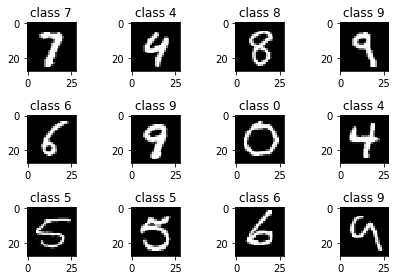

In [47]:
#checking some random images

for i in range(12):
    plt.subplot(3,4,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num],cmap='gray',interpolation='none')
    plt.title("class {}".format(y_train[num]))
    
plt.tight_layout()

In [48]:
#printing and checking pixel values
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Data Preprocessing

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector. Pixel values range from 0 to 255 where 0 is black and 255 is pure white. We will normalize these values by dividing them by 255 so that we get the output pixel values between [0,1] in the same magnitude.

In [49]:
x_train=x_train/255
x_test=x_test/255

In [50]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [51]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


For convolution neural network, we have to add one more dimension for kernel operation

In [52]:
#resizing image

x_train = x_train.reshape(-1,28,28,1) 
x_test = x_test.reshape(-1,28,28,1) 

print("Training sample shape", x_train.shape)
print("Testing sample shape", x_test.shape)

Training sample shape (60000, 28, 28, 1)
Testing sample shape (10000, 28, 28, 1)


# Building a 3-layer Neural Network

Training with 60,000 training samples of mnist dataset

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation , Conv2D, MaxPooling2D, Flatten

In [57]:
#initializing the model

model=Sequential()

In [63]:
#initializing the model

model=Sequential()


# 1st convolutional layer

model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))

#2nd convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

#3rd convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

# Fully connected neural network - 1
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

# Fully connected neural network - 2
model.add(Dense(32, activation = 'relu'))

# Fully connected neural network - 3
model.add(Dense(10, activation = 'softmax'))  #10 classes of output

In [64]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 1, 1, 64)        

In [65]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 81s 61ms/step - loss: 0.2711 - accuracy: 0.9163 - val_loss: 0.1402 - val_accuracy: 0.9582
Epoch 2/5
1313/1313 [==============================] - 118s 90ms/step - loss: 0.0921 - accuracy: 0.9720 - val_loss: 0.0799 - val_accuracy: 0.9756
Epoch 3/5
1313/1313 [==============================] - 81s 61ms/step - loss: 0.0640 - accuracy: 0.9810 - val_loss: 0.0764 - val_accuracy: 0.9763
Epoch 4/5
1313/1313 [==============================] - 73s 55ms/step - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0645 - val_accuracy: 0.9787
Epoch 5/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.0406 - accuracy: 0.9877 - val_loss: 0.0619 - val_accuracy: 0.9822


# Evaluating the model with test Dataset

In [71]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0511 - accuracy: 0.9857


[0.05108383297920227, 0.9857000112533569]

In [68]:
#making prediction

prediction=model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [75]:
print(np.argmax(prediction[5]))

1


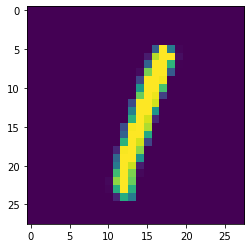

In [76]:
plt.imshow(x_test[5])

# Checking an unknown image

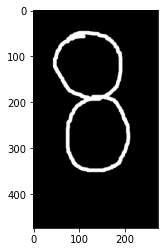

In [77]:
import cv2
img=cv2.imread("D:\\eight.png")
plt.imshow(img)

In [79]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

resized=cv2.resize(gray,(28,28))

In [80]:
newimg=resized.reshape(-1,28,28,1)

In [81]:
newimg.shape

(1, 28, 28, 1)

In [82]:
## Prediction

new_prediction=model.predict(newimg)
print(np.argmax(new_prediction))

1/1 [==============================] - 0s 86ms/step
8
